In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.stattools import OLS
from statsmodels.tsa.stattools import add_constant
import numpy as np

In [2]:
data=pd.read_csv('currency.csv',sep=";", decimal=',',parse_dates=["dates"],index_col=["dates"])

<AxesSubplot:xlabel='dates'>

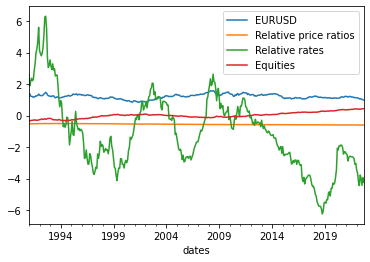

In [3]:
data.plot()

In [8]:
# ADF tests

df_test=adfuller(data.iloc[:,0])

dfoutput = pd.Series(
        df_test[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
for key, value in df_test[4].items():
    dfoutput["Critical Value (%s)" % key] = value
print(dfoutput)

Test Statistic                  -2.283772
p-value                          0.177255
#Lags Used                       0.000000
Number of Observations Used    380.000000
Critical Value (1%)             -3.447676
Critical Value (5%)             -2.869176
Critical Value (10%)            -2.570838
dtype: float64


In [10]:
results = OLS(data.iloc[:,0], add_constant(data.iloc[:,1:4])).fit()
print(results.params)

const                   -1.538230
Relative price ratios   -4.974319
Relative rates           0.002321
Equities                -0.922501
dtype: float64


In [15]:
residuals=results.resid

In [16]:

df_test=adfuller(residuals)

dfoutput = pd.Series(
        df_test[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
for key, value in df_test[4].items():
    dfoutput["Critical Value (%s)" % key] = value
print(dfoutput)

Test Statistic                  -3.469491
p-value                          0.008806
#Lags Used                       0.000000
Number of Observations Used    380.000000
Critical Value (1%)             -3.447676
Critical Value (5%)             -2.869176
Critical Value (10%)            -2.570838
dtype: float64
